### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import GridSearchCV

## Create ML Models, Train Them, and Make Predictions

First, we prepare our data for training

In [2]:
train_data = pd.read_csv('prepared_data/train_data.csv')
test_data = pd.read_csv('prepared_data/test_data.csv')

In [3]:
target = 'charges'

y_train = train_data[target].copy()
y_test = test_data[target].copy()

# Drop 'charges' column
X_train = train_data.drop(target, axis=1)
X_test = test_data.drop(target, axis=1)

Here are the classification models we are using to make predictions:
* Linear Regression
* Random Forest Regressor
* XGBoost Regressor
* Neural Network

Now, we set them up with default parameters.

In [4]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
nn = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
nn.compile(optimizer='adam', loss='mae')

c:\Users\nguye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Then, we fit the models with the data we prepared.

In [5]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 13769.6719 - val_loss: 12122.8691
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12815.5264 - val_loss: 11484.6133
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 12679.8779 - val_loss: 10623.8887
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11890.7900 - val_loss: 9742.9482
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9694.4639 - val_loss: 9098.7959
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9315.9443 - val_loss: 8877.5605
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9340.9062 - val_loss: 8907.5693
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9294.5654 - val_loss: 8891.4482
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9364.8438 - val_loss: 8802.2646
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8661.8926 - val_loss: 8754.5557
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8901.8057 - val_loss: 

In [6]:
y_train_lr = lr.predict(X_train)
y_test_lr = lr.predict(X_test)

y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

y_train_nn = nn.predict(X_train)
y_test_nn = nn.predict(X_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error


def evaluate_model(y_true, y_pred):
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

print("Training Performance")
print("Logistic Regression")
evaluate_model(y_train, y_train_lr)
print("Random Forest")
evaluate_model(y_train, y_train_rf)
print("XGBoost")
evaluate_model(y_train, y_train_xgb)
print("Newral Network")
evaluate_model(y_train, y_train_nn)

Training Performance
Logistic Regression
MAE: 4202.64
MSE: 37237484.00
RMSE: 6102.25
R²: 0.74
Random Forest
MAE: 1027.60
MSE: 3348540.21
RMSE: 1829.90
R²: 0.98
XGBoost
MAE: 494.79
MSE: 699820.92
RMSE: 836.55
R²: 1.00
Newral Network
MAE: 7056.31
MSE: 154162744.30
RMSE: 12416.23
R²: -0.07


We can see that XGBoost is the best performance for training, followed by Random Forest, Linear Regression, and Neural Network

In [8]:
print("Test Performance")
print("Logistic Regression")
evaluate_model(y_test, y_test_lr)
print("Random Forest")
evaluate_model(y_test, y_test_rf)
print("XGBoost")
evaluate_model(y_test, y_test_xgb)
print("Newral Network")
evaluate_model(y_test, y_test_nn)

Test Performance
Logistic Regression
MAE: 4197.09
MSE: 33806854.35
RMSE: 5814.37
R²: 0.78
Random Forest
MAE: 2752.95
MSE: 22217504.56
RMSE: 4713.54
R²: 0.86
XGBoost
MAE: 2806.07
MSE: 24193508.01
RMSE: 4918.69
R²: 0.84
Newral Network
MAE: 7074.11
MSE: 155399491.14
RMSE: 12465.93
R²: -0.00


We can see that Random Forest is the best performance for testing, followed by XGBoost, Linear Regression, and Neural Network

## View the Results and Compare with Training Data

In [9]:
mse_train_lr = mean_squared_error(y_train, y_train_lr)
mse_train_rf = mean_squared_error(y_train, y_train_rf)
mse_train_xgb = mean_squared_error(y_train, y_train_xgb)
mse_train_nn = mean_squared_error(y_train, y_train_nn)

mse_test_lr = mean_squared_error(y_test, y_test_lr)
mse_test_rf = mean_squared_error(y_test, y_test_rf)
mse_test_xgb = mean_squared_error(y_test, y_test_xgb)
mse_test_nn = mean_squared_error(y_test, y_test_nn)

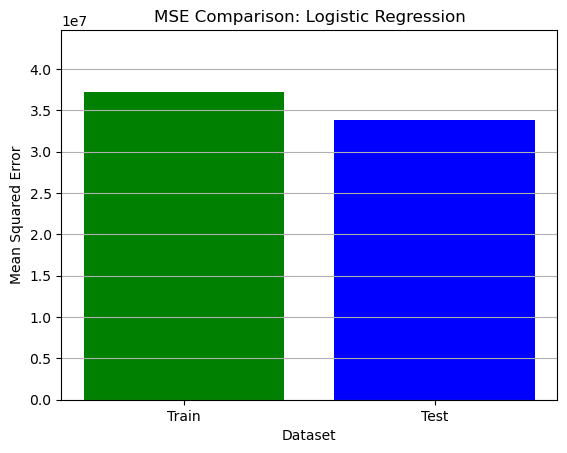

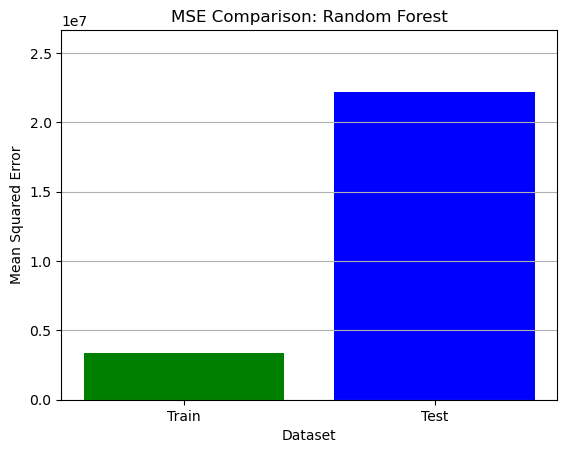

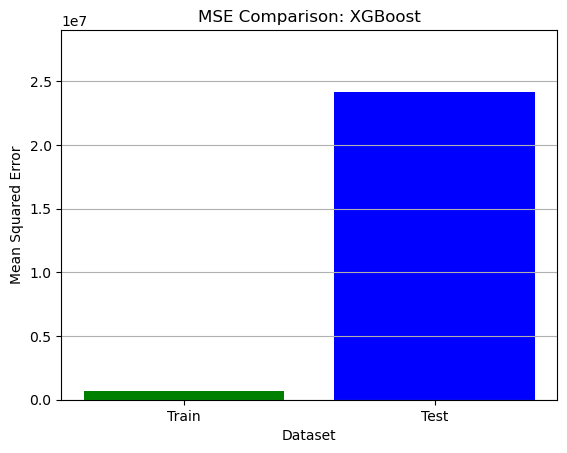

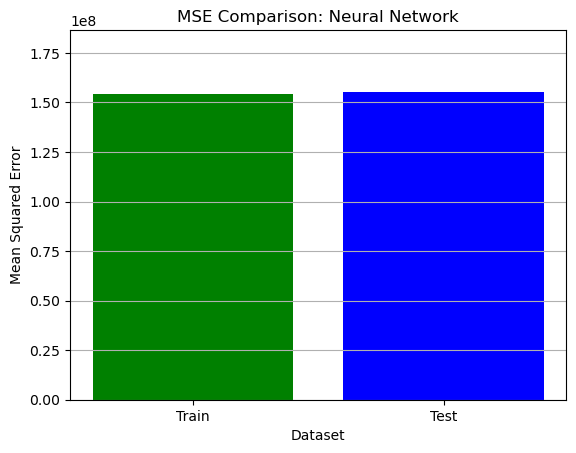

In [ ]:
train_MSE = [mse_train_lr, mse_train_rf, mse_train_xgb, mse_train_nn]
test_MSE = [mse_test_lr, mse_test_rf, mse_test_xgb, mse_test_nn]
algos = ["Linear Regression", "Random Forest", "XGBoost", "Neural Network"]

for i in range(len(train_MSE)):
    plt.bar(['Train', 'Test'], [train_MSE[i], test_MSE[i]], color=['green', 'blue'])
    plt.xlabel('Dataset')
    plt.ylabel('Mean Squared Error')
    plt.title(f'MSE Comparison: {algos[i]}')
    
    # Automatically scale y-axis to fit the values
    max_mse = max(train_MSE[i], test_MSE[i])
    plt.ylim(0, max_mse * 1.2)
    
    plt.grid(axis='y')
    plt.show()

Let's see how much of a difference the results would be if we add some hyperparameter tuning.

# Hyperparameter Tuning

## Linear Regression

In [18]:
param_grid_lr = {
    'fit_intercept': [True, False],  # Whether to include bias (y = mx + b)
    'copy_X': [True, False],         # Copies data before fitting (rarely changed)
    'positive': [True, False]        # Forces coefficients to be positive (new in sklearn 1.0+)
}

grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_ # Get the best estimator from the grid search

best_lr_res = best_lr.predict(X_test)

mse_best_lr = mean_squared_error(y_test, best_lr_res)

best_params = grid_lr.best_params_
print(f"Best parameters: {best_params}")
print(f"Test MSE: {mse_best_lr}")

Best parameters: {'copy_X': True, 'fit_intercept': False, 'positive': False}
Test MSE: 33806854.35250803


c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nguye\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 640, in fit
    self.coef_ = opt

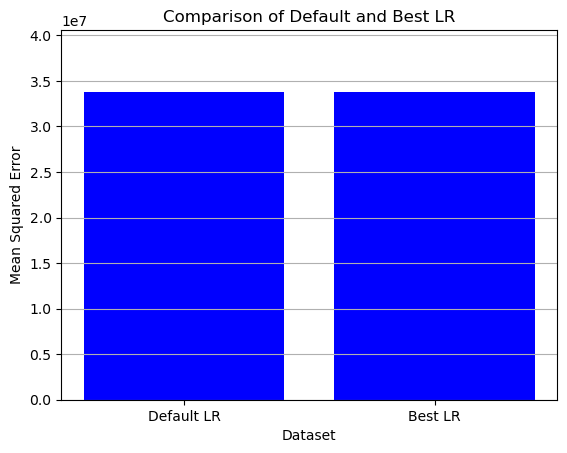

In [20]:
# Plotting the comparison
plt.bar(['Default LR', 'Best LR'], [mse_test_lr, mse_best_lr], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Default and Best LR')
# Automatically scale y-axis to fit the values
max_mse = max(mse_test_lr, mse_best_lr)
plt.ylim(0, max_mse * 1.2)

plt.grid(axis='y')
plt.show()

## Random Forest

In [22]:
param_grid_rf = {
    'n_estimators': [100, 200],          # Fewer trees (default=100 is often enough)
    'max_depth': [None, 10, 20],         # None (unlimited) + moderate depths
    'min_samples_split': [2, 5],         # Default=2; avoid large values (e.g., 10)
    'min_samples_leaf': [1, 2],          # Default=1; avoid >2 for text data
    'max_features': ['sqrt', 0.8],       # Default='sqrt'; test slight variation
    'bootstrap': [True, False],          # Test with/without bootstrapping
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_ # Get the best estimator from the grid search

best_rf_res = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, best_rf_res)

best_params = grid_rf.best_params_
print(f"Best parameters: {best_params}")
print(f"Test MSE: {mse_best_rf}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 19729767.630177327


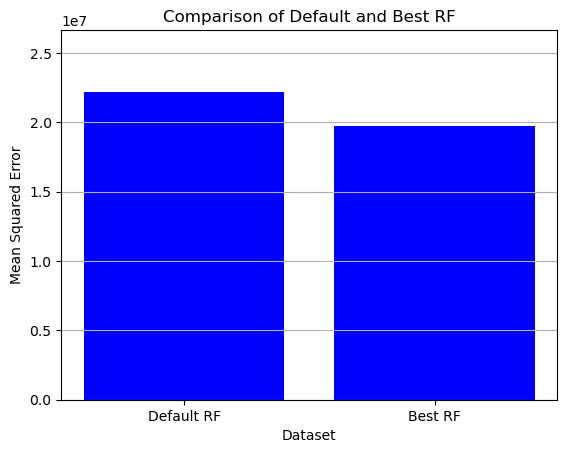

In [23]:
# Plotting the comparison
plt.bar(['Default RF', 'Best RF'], [mse_test_rf, mse_best_rf], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Default and Best RF')
# Automatically scale y-axis to fit the values
max_mse = max(mse_test_rf, mse_best_rf)
plt.ylim(0, max_mse * 1.2)

plt.grid(axis='y')
plt.show()

## XGBoost

In [26]:
param_grid_xgb = {
    'n_estimators': [100, 200],          # Fewer options (200 is usually enough)
    'learning_rate': [0.1, 0.2, 0.3],    # Avoid tiny values (0.01 is too slow)
    'max_depth': [6, 9, 12],             # Deeper trees for text data
    'subsample': [1.0],                  # No row sampling (unless data is huge)
    'colsample_bytree': [1.0],           # No feature sampling (unless high-dim)
    'gamma': [0, 0.05],                  # Minimal regularization
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_ # Get the best estimator from the grid search

best_xgb_res = best_xgb.predict(X_test)

mse_best_xgb = mean_squared_error(y_test, best_xgb_res)

best_params = grid_xgb.best_params_
print(f"Best parameters: {best_params}")
print(f"Test MSE: {mse_best_xgb}")

Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Test MSE: 22122740.94404941


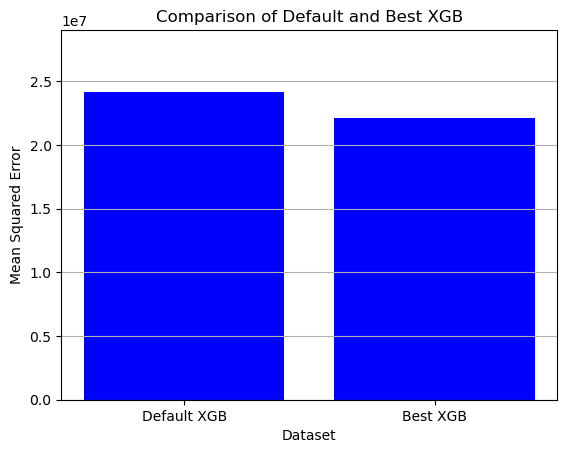

In [25]:
# Plotting the comparison
plt.bar(['Default XGB', 'Best XGB'], [mse_test_xgb, mse_best_xgb], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Default and Best XGB')
# Automatically scale y-axis to fit the values
max_mse = max(mse_test_xgb, mse_best_xgb)
plt.ylim(0, max_mse * 1.2)

plt.grid(axis='y')
plt.show()

## Neural Network

In [ ]:
from tensorflow import keras
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    
    # Tunable layers
    model.add(layers.Dense(
        units=hp.Int('num_units_layer1', 32, 128, step=32),
        activation=hp.Choice('activation', ['relu', 'leaky_relu', 'elu']),
        input_shape=(X_train.shape[1],),
        kernel_regularizer=keras.regularizers.l2(hp.Float('l2_reg', 0.0, 0.01))
    ))
    model.add(layers.Dropout(hp.Float('dropout_rate', 0.0, 0.5)))
    
    model.add(layers.Dense(
        units=hp.Int('num_units_layer2', 16, 64, step=16),
        activation=hp.Choice('activation', ['relu', 'leaky_relu', 'elu'])
    ))
    
    model.add(layers.Dense(1))
    
    # Tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss='mse',
        metrics=['mae']
    )
    return model

# Initialize tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    # directory='keras_tuner_dir' # If you want to export trail results
)

# Run search with early stopping
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters()[0]

# Evaluate
mse_best_nn = best_model.evaluate(X_test, y_test)[0]
print(f"Test MSE: {mse_best_nn}")
print("Best hyperparameters:", best_hps.values)

Trial 10 Complete [00h 00m 53s]
val_loss: 124419004.0

Best val_loss So Far: 46887084.0
Total elapsed time: 00h 08m 02s


c:\Users\nguye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nguye\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 34799700.0000 - mae: 4164.4658 
Test MSE: 38370416.0
Best hyperparameters: {'num_units_layer1': 128, 'activation': 'elu', 'l2_reg': 0.0034797393807152756, 'dropout_rate': 0.36777378362964297, 'num_units_layer2': 16, 'learning_rate': 0.007912697087826468}


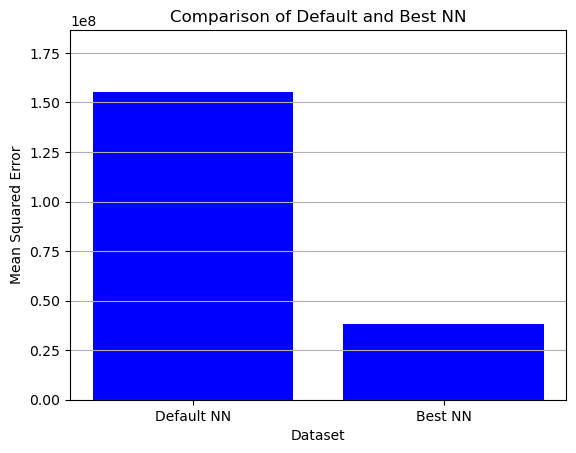

In [ ]:
# Plotting the comparison
plt.bar(['Default NN', 'Best NN'], [mse_test_nn, mse_best_nn], color='blue')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Default and Best NN')
# Automatically scale y-axis to fit the values
max_mse = max(mse_test_nn, mse_best_nn)
plt.ylim(0, max_mse * 1.2)

plt.grid(axis='y')
plt.show()